SARSA success rate: 100.00%


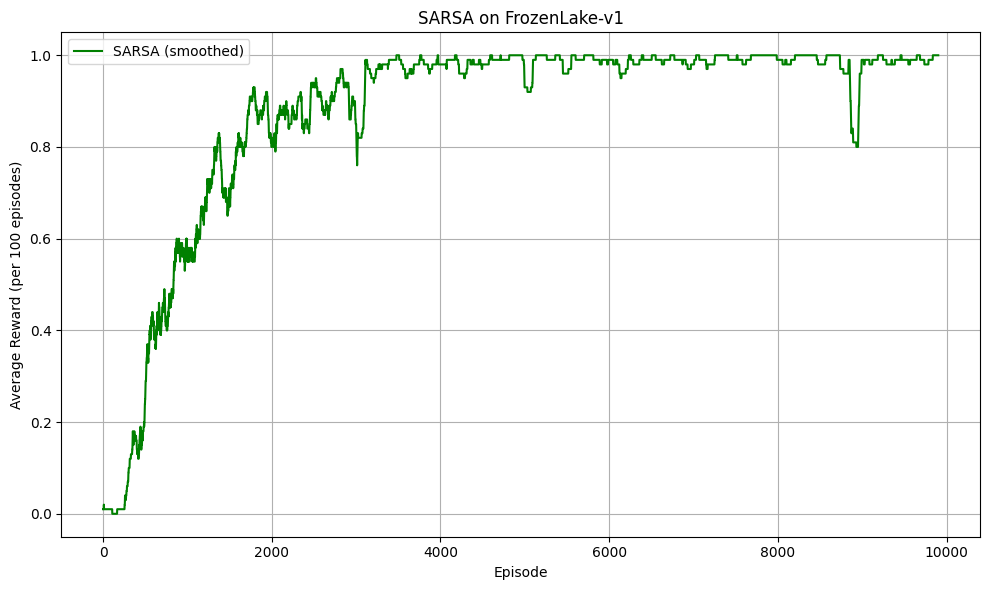

In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt


def sarsa(env, episodes=10000, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.999, min_epsilon=0.01):
    state_size = env.observation_space.n
    action_size = env.action_space.n
    q_table = np.zeros((state_size, action_size))
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = (1 - alpha) * q_table[state, action] + \
                                     alpha * (reward + gamma * q_table[next_state, next_action])

            state = next_state
            action = next_action
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)

    return q_table, rewards

def test_agent(env, q_table, episodes=100):
    total_rewards = 0
    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = np.argmax(q_table[state, :])
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_rewards += reward
    return total_rewards / episodes

# Create two environments (separate instances to avoid contamination)
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode=None)

# Train agents

q_table_sarsa, rewards_sarsa = sarsa(env)

# Evaluate

success_rate_sarsa = test_agent(env, q_table_sarsa)

print(f"SARSA success rate: {success_rate_sarsa * 100:.2f}%")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_sarsa, np.ones(100)/100, mode='valid'), label='SARSA (smoothed)', color='green')
plt.xlabel('Episode')
plt.ylabel('Average Reward (per 100 episodes)')
plt.title('SARSA on FrozenLake-v1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
